<img alt='UCL' src="images/ucl_logo.png" align='center'>


[<img src="images/noun_post_2109127.svg" width="50" align='right'>](016_Python_for.ipynb)
[<img src="images/noun_pre_2109128.svg" width="50" align='right'>](018_Python_xxx.ipynb)



#  024 Image display


### Purpose

We have seen from [021 Streams](021_Streams.ipynb) and [022 Read write files](022_Read_write_files.ipynb) how to access both text and binary datasets, either from the local file system or from a URL and in [023 Plotting](023_Plotting.ipynb) how to use [`matplotlib`](https://matplotlib.org) for plotting graphs. 

In this section, we will learn how to view images using [`matplotlib`](https://matplotlib.org/3.3.1/tutorials/introductory/images.html).

You might follow these notes up by looking at the Python package [`folium`](https://python-visualization.github.io/folium/) for interactive displays.

### Prerequisites

You will need some understanding of the following:


* [001 Using Notebooks](001_Notebook_use.ipynb)
* [002 Unix](002_Unix.ipynb) with a good familiarity with the UNIX commands we have been through.
* [003 Getting help](003_Help.ipynb)
* [010 Variables, comments and print()](010_Python_Introduction.ipynb)
* [011 Data types](011_Python_data_types.ipynb) 
* [012 String formatting](012_Python_strings.ipynb)
* [013_Python_string_methods](013_Python_string_methods.ipynb)
* [020_Python_files](020_Python_files.ipynb)
* [021 Streams](021_Streams.ipynb)
* [022 Read write files](022_Read_write_files.ipynb)
* [023 Plotting](023_Plotting.ipynb)


## Read and plot a dataset

### MODIS

We have seen in [022 Read write files](022_Read_write_files.ipynb#read-and-write-binary-data) how we can access a MODIS dataset. In an [exercise](022_Read_write_files.ipynb#Exercise-3) we wrote a function `get_data` that returned a dictionary of spatial datasets, given a MODIS HDF filename. Here, we will use the similar function ` modis.get_data` that returns the same form of data dictionary, but driven by the year and day of year (`doy`). The product and other parameters are specified in the keyword arguments. We will look into MODIS products in more detail in a subsequent session. In this session, we will use `MCD15A3H` and 

For example, to get the LAI product `MCD15A3H` and the land cover product `MCD12Q1`, layer `LC_Type1` to visualise. Many of these datasets are pre-cached for you, so you should get a fast response. If the plotting seems to be taking too long, set `verbose=True` in the `kwargs` to get details of the underlying processing.

First then, we access the product `MCD15A3H`. This is produced every 4 days in a year, so in specifying `doy`, we use `doy=4*n + 1` for the `nth` dataset of the year.

In [1]:
from  geog0111.modis import Modis

kwargs = {
    'product'    : 'MCD15A3H',
    'tile'       : ['h17v03'],
}

modis = Modis(**kwargs)
# specify day of year (DOY) and year
data_MCD15A3H = modis.get_data(2019,1+4*10)

# loop over dictionary items
for k,v in data_MCD15A3H.items():
    if k in modis.sds:
        # do some neat formatting on k
        print(f'{k:<20s}: {v.shape}')

Fpar_500m           : (2400, 2400)
Lai_500m            : (2400, 2400)
FparLai_QC          : (2400, 2400)
FparExtra_QC        : (2400, 2400)
FparStdDev_500m     : (2400, 2400)
LaiStdDev_500m      : (2400, 2400)


So any of these datasets, `data[Fpar_500m]`, `data[Lai_500m]` are two dimensional datasets (`(2400, 2400)`) that we might display as images. For example `data[Lai_500m]`.

We follow much the same recipe as for [plotting line graphs](023_Plotting.ipynb), but instead of using `axs.plot()` we use `axs.imshow()`. Further, we can set the subplot title with `axs.set_title(k)` as before. We can usefully include a colour wedge with the plot with `fig.colorbar(im, ax=axs)`.

When we plot with `axs.imshow()`, we can optionally use the keywords `vmin=` and `vmax=` to set upper and lower thresholds for the data plotted.

You should generally use `interpolation='nearest'` when plotting an image dataset as a measurement (e.g. a remote sensing dataset), otherwise it may be interpolated.

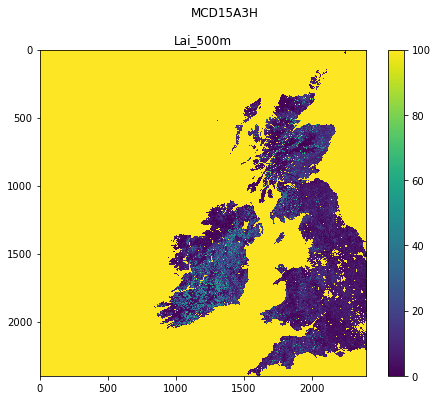

In [2]:
import matplotlib.pyplot as plt

k = 'Lai_500m'
name = f'{kwargs["product"]}'

# plot size 
x_size,y_size = 8,6
shape = (1,1)

fig, axs = plt.subplots(shape[0],shape[1],figsize=(x_size,y_size))
# dont flatten if shape is (1,1)
if shape[0] == 1 and shape[1] == 1:  
    axs = [axs]
else:
    axs = axs.flatten()
# set the figure title
fig.suptitle(name)

# plot image data: use vmin and vmax to set limits
im = axs[0].imshow(data_MCD15A3H[k],\
                   vmin=0,vmax=100,\
                   interpolation='nearest')
axs[0].set_title(k)
fig.colorbar(im, ax=axs[0])

#### Exercise 1

* Plots the first datasets in `data_MCD15A3H` as subplots in a 2 x 2 shape.

Hint: Use a loop for the keys of `data_MCD15A3H`. Set up the 2 x 2 subplots with:

    fig, axs = plt.subplots(2,2,figsize=(x_size,y_size))
    axs = axs.flatten()
    
then you can refer to the subplot axes as `ax[0]`, `ax[1]`, `ax[2]` and `ax[3]` when you loop over the keys. Don't forget to increase `x_size,y_size` appropriately.

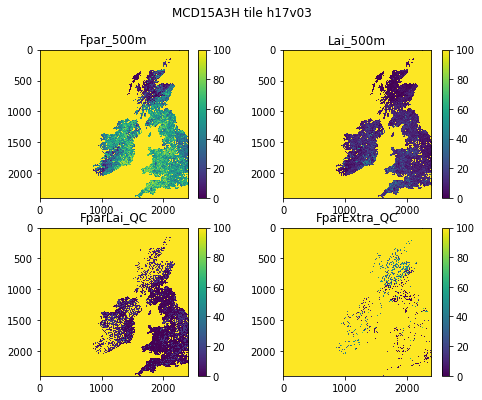

In [3]:
import matplotlib.pyplot as plt
from  geog0111.modis import Modis

kwargs = {
    'product'    : 'MCD15A3H',
    'tile'       : 'h17v03',
}

modis = Modis(**kwargs)
data_MCD15A3H = modis.get_data(2020,1+20*4) 

# this is mnost neatly done with a 
# loop over the keys we want
keys = list(data_MCD15A3H.keys())[:4]

name = f'{kwargs["product"]} tile {kwargs["tile"]}'
# plot size 
x_size,y_size = 8,6
shape = (2,2)

fig, axs = plt.subplots(*shape,figsize=(x_size,y_size))
# dont flatten if shape is (1,1)
if shape[0] == 1 and shape[1] == 1:  
    axs = [axs]
else:
    axs = axs.flatten()# set the figure title
fig.suptitle(name)

# the loop
for i,k in enumerate(keys):
    # plot image data
    im = axs[i].imshow(data_MCD15A3H[k],\
                   vmin=0,vmax=100,\
                   interpolation='nearest')
    axs[i].set_title(k)
    fig.colorbar(im, ax=axs[i])

## Colourmaps

As you would expect, you can customise your plots. We illustrate this by changing the colourmap used here in a pseudocolour display of the data. For some others, [please see the matplotlib tutorial](https://matplotlib.org/tutorials/introductory/images.html).

There are various ways to set the colour map, but when working with sub-images, trhe easiest is of the form:

    im = ax.imshow(data)
    im.set_cmap(c)

where `c` here is some colourmap.

For further discussions on colourmaps and options see the [relevant tutorial]( 
https://matplotlib.org/3.1.1/tutorials/colors/colormaps.html) and the [colour map reference](
https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html).

In this set of sub-plots, we switch off the image ticks for a clearer plot.

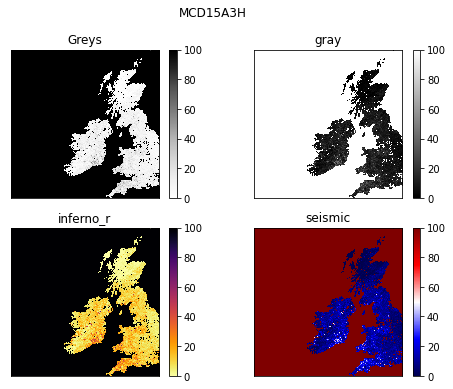

In [4]:
import matplotlib.pyplot as plt

k = 'Lai_500m'
name = f'{kwargs["product"]}'

# plot size 
x_size,y_size = 8,6
shape = (2,2)

fig, axs = plt.subplots(*shape,figsize=(x_size,y_size))
# dont flatten if shape is (1,1)
if shape[0] == 1 and shape[1] == 1:  
    axs = [axs]
else:
    axs = axs.flatten()

# this new cmd switches off the tick
plt.setp(axs, xticks=[], yticks=[])

# set the figure title
fig.suptitle(name)

cmaps = ['Greys','gray','inferno_r','seismic']

for i,c in enumerate(cmaps):
    # plot image data
    im = axs[i].imshow(data_MCD15A3H[k],\
                   vmin=0,vmax=100,\
                   interpolation='nearest')
    im.set_cmap(c)
    axs[i].set_title(c)
    fig.colorbar(im, ax=axs[i])

#### Exercise 2

* write a function called `im_display` that takes as input:
    * a data dictionary
    * a list of keywords of datasets to plot
    * optionally:
        * a title
        * a colourmap name
        * lower and upper limits for plot data (vmin, vmax)
        * x_size,y_size
        * subplots shape : e.g. (2,2)

You should assume some default values for the optional items if not given. For the subplots shape, assume it is `(n,1)` where `n` is the length of the keyword list.

You should set the default values of `vmin` and `vmax` to `None`, as this just then takes the dataset default minimum and maximum.

Your code should be well-documented.

* test your code

Note that you will have to experiment a bit with the `x_size,y_size` values to get a good plot. It is not easy to automate that.

## Quantised data: Land Cover

Sometimes we want quantised colourmaps, for example for a land cover classification map. You can do these perfectly well in `matplotlib`, but the process is a little more involved.

We will take as an example the MODIS product `MCD12Q1` over the UK. The land cover layer we are interested in is called `LC_Type1`. The [land cover names](https://lpdaac.usgs.gov/documents/101/MCD12_User_Guide_V6.pdf) associated with this are given in the file [data/LC_Type1_class.csv](data/LC_Type1_class.csv), along with example colour mappings.

In [5]:
import pandas as pd

lc_Type1 = pd.read_csv('data/LC_Type1_colour.csv')
lc_Type1

,code,class,colour
0,-1,Unclassified,black
1,1,Evergreen_Needleleaf_Forests,darkgreen
2,2,Evergreen_Broadleaf_Forests,darkolivegreen
3,3,Deciduous_Needleleaf_Forests,green
4,4,Deciduous_Broadleaf_Forests,lightgreen
5,5,Mixed_Forests,yellow
6,6,Closed_Shrublands,blue
7,7,Open_Shrublands,tan
8,8,Woody_Savannas,brown
9,9,Savannas,khaki


The process of setting up a colourmap is explained in this [Earth Lab](https://www.earthdatascience.org/courses/scientists-guide-to-plotting-data-in-python/plot-spatial-data/customize-raster-plots/customize-matplotlib-raster-maps/) page.

The three steps are:

    * set up colour names associated with the class names
    * generate matplotlib cmap and norm objects from these
    * set up the legend
    
We can choose colour names from the [`matplotlib` gallery](https://matplotlib.org/3.1.0/gallery/color/named_colors.html) if we don't like the defaults set up.

It is an annual dataset, with only valid files for January 1st of the year.

In [6]:
from geog0111.modis import Modis

# UK
kwargs = {
    'tile'      :    ['h17v03', 'h18v03'],
    'product'   :    'MCD12Q1',
}

year  = 2019

# get the data
modis = Modis(**kwargs)
# specify day of year (DOY) and year
data_MCD12Q1 = modis.get_data(year,1)

In [7]:
# generate matplotlib cmap and norm objects from these
import matplotlib

cmap = matplotlib.colors.\
        ListedColormap(list(lc_Type1['colour']))
norm = matplotlib.colors.\
        BoundaryNorm(list(lc_Type1['code']), len(lc_Type1['code']))

In [8]:
import matplotlib.patches
# set up the legend
legend_labels = dict(zip(list(lc_Type1['colour']),list(lc_Type1['class'])))
patches = [matplotlib.patches.Patch(color=c, label=l)
           for c,l in legend_labels.items()]

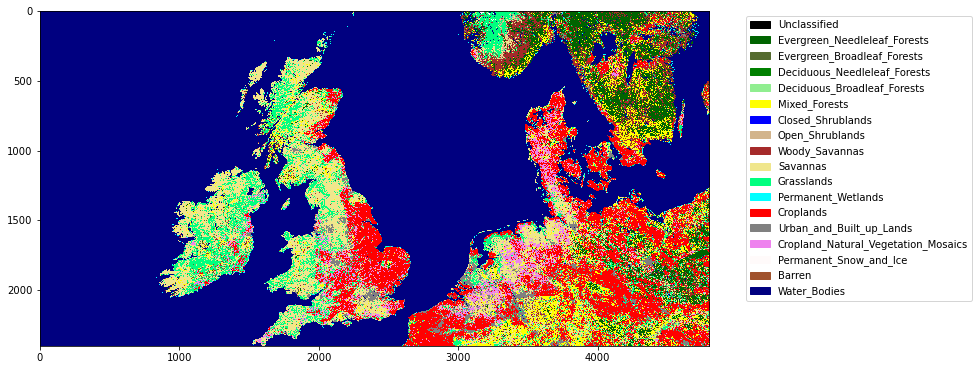

In [9]:
# plot
import matplotlib.pyplot as plt
x_size,y_size = 12,12
fig, axs = plt.subplots(1,figsize=(x_size,y_size))
im = axs.imshow(data_MCD12Q1['LC_Type1'],cmap=cmap,norm=norm,interpolation='nearest')
plt.legend(handles=patches,
          bbox_to_anchor=(1.4, 1),
          facecolor="white")

#### Exercise 3

* Write a function called `plot_lc` that takes as input modis land cover dataset and plots the associated land cover map
* You might use `x_size,y_size` as optional inputs to improve scaling

In [10]:
# ANSWER
# this is a little long-winded, but just wraps up the codes above
import matplotlib
import matplotlib.patches
import matplotlib.pyplot as plt
from geog0111.modis import Modis
import pandas as pd

def plot_lc(data,x_size=12,y_size=12):
    '''
    takes as input MODIS LC dataset
    plots the associated land cover map

    x_size,y_size as optional inputs
    '''
    lc_Type1 = pd.read_csv('data/LC_Type1_colour.csv')

    # generate matplotlib cmap and norm objects from these

    # get the LC codes, colours and classes
    # from LC_Type1_class and LC_Type1_colour
    cmap = matplotlib.colors.\
            ListedColormap(list(lc_Type1['colour']))
    norm = matplotlib.colors.\
            BoundaryNorm(list(lc_Type1['code']), len(lc_Type1['code']))

    # set up the legend
    legend_labels = dict(zip(list(lc_Type1['colour']),\
                             list(lc_Type1['class'])))
    patches = [matplotlib.patches.Patch(color=c, label=l)
               for c,l in legend_labels.items()]
    fig, axs = plt.subplots(1,figsize=(x_size,y_size))
    im = axs.imshow(data,cmap=cmap,norm=norm,interpolation='nearest')
    plt.legend(handles=patches,
              bbox_to_anchor=(1.4, 1),
              facecolor="white")

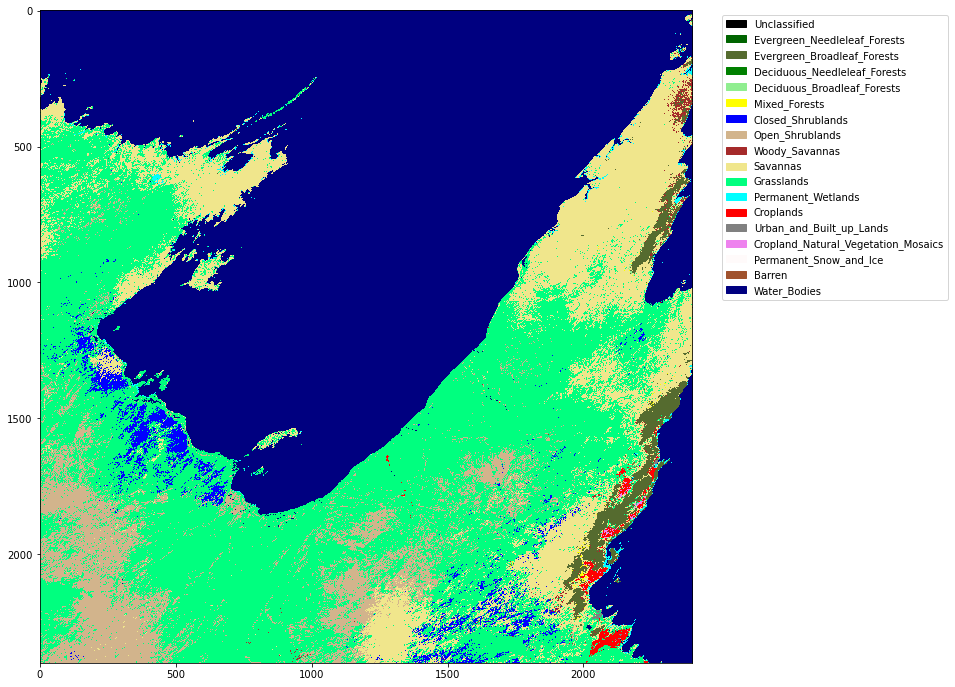

In [11]:
from geog0111.modis import Modis
from geog0111.plot_lc import plot_lc
year,tiles = 2018,['h31v10']

# ensure tiles is a list
kwargs = {
    'tile'      :    list(tiles),
    'product'   :    'MCD12Q1',
    'sds'       :    ['LC_Type1']
}
# get the data
modis = Modis(**kwargs)
# specify day of year (DOY) and year
data_MCD12Q1 = modis.get_data(year,doy=1)
# the data we want here
plot_lc(data_MCD12Q1['LC_Type1'])

In [12]:
# ANSWER
import matplotlib.pyplot as plt
from  geog0111.modis import Modis

kwargs = {
    'product'    : 'MCD15A3H',
    'tile'       : 'h17v03',
}

modis = Modis(**kwargs)
data_MCD15A3H = modis.get_data(2020,1+20*4) 

def im_display(data,names,\
               title=None,colourmap=None,\
               vmin=None,vmax=None,\
               x_size=12,y_size=8,shape=None):
    '''
    a function called im_display that takes as input:
        data  :  a data dictionary
        names :  a list of keywords of datasets to plot

        optionally:
            title = None     : a title
            colourmap = None : a colourmap name
            vmin,vmax        : lower and upper limits for plot data
            x_size=16        : plot x size * shape[0]
            y_size=12        : plot y size * shape[1]
            shape=None       : subplots shape : e.g. (2,2)
    '''
    # sort out options
    n = len(names)
    if shape == None:
        shape = (n,1)
    # adaptive size
    x_size = x_size * shape[0]
    y_size = y_size * shape[1]

    fig, axs = plt.subplots(*shape,figsize=(x_size,y_size))
    if shape[0] == 1 and shape[1] == 1:  
        axs = [axs]
    else:
        axs = axs.flatten()
    # switch off ticks
    plt.setp(axs, xticks=[], yticks=[])

    # set the figure title
    if title:
        fig.suptitle(title)

    # loop over names
    for i,k in enumerate(names):
        # plot image data
        im = axs[i].imshow(data[k],\
                   vmin=vmin,vmax=vmax,\
                   interpolation='nearest')
        if colourmap:
            im.set_cmap(colourmap)
        axs[i].set_title(k)
        fig.colorbar(im, ax=axs[i])    
        

In [ ]:
# test
import matplotlib.pyplot as plt
from  geog0111.modis import Modis

kwargs = {
    'product'    : 'MCD15A3H',
    'tile'       : 'h17v03',
}

modis = Modis(**kwargs)
data_MCD15A3H = modis.get_data(2020,1+20*4) 

# this is mnost neatly done with a 
# loop over the keys we want
keys = list(data_MCD15A3H.keys())[:4]

name = f'{kwargs["product"]} tile {kwargs["tile"]}'

im_display(data_MCD15A3H,keys,\
               title=None,colourmap=None,\
               x_size=4,y_size=14,shape=(4,1))

In [ ]:
im_display(data_MCD15A3H,keys,\
               title=None,colourmap='gray',\
               x_size=4,y_size=3,shape=(2,2))

## Summary

In this section, we have learned how to plot images from datasets we have read in or downloaded from the web. We have concentrated on MODIS datasets, stored in a data dictionary. We used `modis.get_data` to load the MODIS datasets. We developed a function called `im_display` to provide a simple wrapper for plotting.

We have also looked into how to do categorised mapping, for example for land cover, and written a function called `plot_lc` to achieve this.


[<img src="images/noun_post_2109127.svg" width="50" align='right'>](016_Python_for.ipynb)
[<img src="images/noun_pre_2109128.svg" width="50" align='right'>](014_Python_groups.ipynb)
